In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

In [2]:
df = pd.read_csv('data_sets/mod3p1.csv', encoding='latin-1')

In [3]:
print (len(df))
print (df['Zip_Code'].nunique())

32526
14803


In [4]:
df.sort_values('Zip_Code',ascending=True).head(2)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
32481,72026,72,Puerto Rico,PR,Adjuntas Municipio,Adjuntas,Adjuntas,Track,Track,601,787,42529236,210360,18.155582,-66.701046,24000,15004,29483,1243.880991
32519,7202946,72,Puerto Rico,PR,Adjuntas Municipio,Adjuntas,Adjuntas,Track,Track,601,787,44833906,90659,18.204166,-66.737830,19807,9378,21654,524.345149


In [5]:
df = df.drop_duplicates(subset='Zip_Code', keep='first')
len(df)

14803

In [6]:
df = df.drop(['id','State_ab','Primary','Area_Code','Lat','Lon','County','State_Code','Place','sum_w','City'],axis = 1)

In [7]:
df.head(2)

,State_Name,Type,Zip_Code,ALand,AWater,Mean,Median,Stdev
0,Alabama,City,36611,10894952,909156,38773,30506,33101
1,Alabama,City,36048,26070325,23254,37725,19528,43789


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14803 entries, 0 to 32483
Data columns (total 8 columns):
State_Name    14803 non-null object
Type          14803 non-null object
Zip_Code      14803 non-null int64
ALand         14803 non-null int64
AWater        14803 non-null int64
Mean          14803 non-null int64
Median        14803 non-null int64
Stdev         14803 non-null int64
dtypes: int64(6), object(2)
memory usage: 1.0+ MB


In [9]:
df1 = pd.read_csv('data_sets/pop-by-zip-code.csv')

In [10]:
df1.head(2)

,zip_code,y-2016
0,601,17800
1,602,39716


In [11]:
print (len(df1))
print (df1['zip_code'].nunique())

33120
33120


In [12]:
df1['y-2016'].sum()

322072436

In [13]:
df1 = df1.rename(index=str, columns={"zip_code": "Zip_Code",'y-2016':'Population'})
df1.head(1)

,Zip_Code,Population
0,601,17800


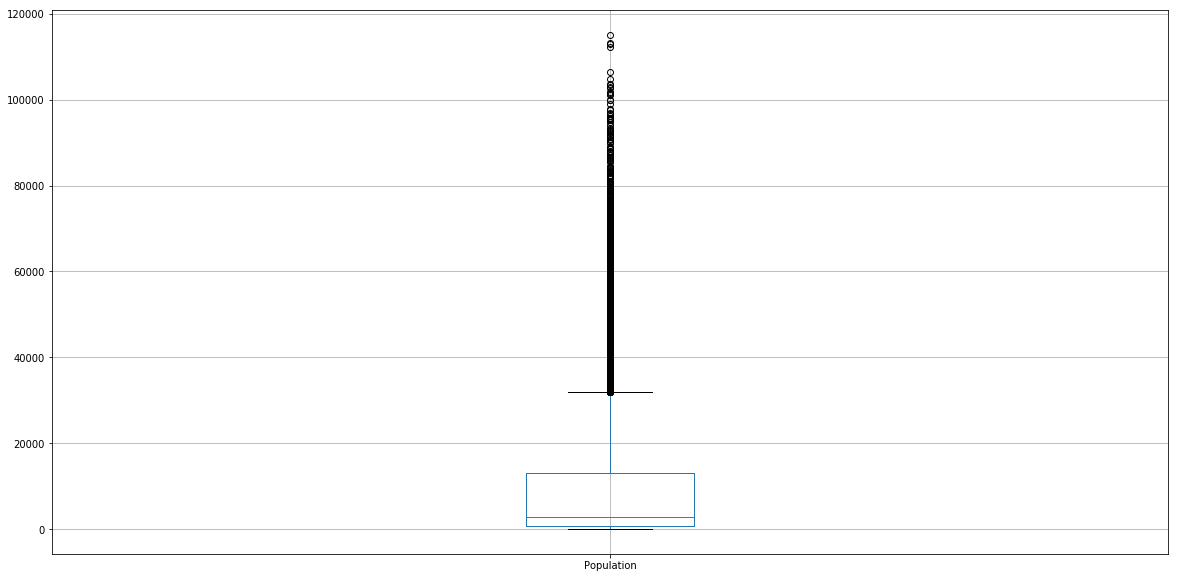

In [14]:
plt.figure(figsize=(20, 10))
df1.boxplot(column=['Population'])
plt.show();

In [15]:
df1[df1['Population']<1000].count()


Zip_Code      10144
Population    10144
dtype: int64

In [16]:
df1 = df1[df1['Population']>1000]

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22968 entries, 0 to 33119
Data columns (total 2 columns):
Zip_Code      22968 non-null int64
Population    22968 non-null int64
dtypes: int64(2)
memory usage: 538.3+ KB


In [18]:
df3 = pd.merge(df, df1, on='Zip_Code', how='inner')

In [19]:
len(df3)

13754

In [20]:
df3.isnull().sum()

State_Name    0
Type          0
Zip_Code      0
ALand         0
AWater        0
Mean          0
Median        0
Stdev         0
Population    0
dtype: int64

In [21]:
df4=pd.read_excel('data_sets/tableAll.xlsx')
df4.head(2)

,"Number of beneficiaries with benefits in current-payment status and total monthly benefits, December 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,State or area,ZIP Code,Number,NaN,NaN,NaN,NaN,NaN,Total monthly benefits\n(thousands of dollars),NaN,NaN,Number of OASDI beneficiaries aged 65 or older
1,NaN,NaN,Total,Retired workers,Disabled workers,Widow(er)s and parents,Spouses,Children,All beneficiaries,Retired workers,Widow(er)s and parents,NaN


In [22]:
df4 = df4.drop(['Unnamed: 2','Unnamed: 8'],axis = 1)

In [23]:
df4.at[1, 'Number of beneficiaries with benefits in current-payment status and total monthly benefits, December 2017'] = 'State or area'
df4.at[1, 'Unnamed: 1'] = 'Zip_Code'
df4.at[1, 'Unnamed: 11'] ='Number of OASDI beneficiaries aged 65 or older'
df4.at[1,'Unnamed: 3'] = 'Retired_workers_number'
df4.at[1,'Unnamed: 5'] = 'Widow(er)s_and_parents_number'

In [24]:
df4.head(2)

,"Number of beneficiaries with benefits in current-payment status and total monthly benefits, December 2017",Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,State or area,ZIP Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number of OASDI beneficiaries aged 65 or older
1,State or area,Zip_Code,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Retired workers,Widow(er)s and parents,Number of OASDI beneficiaries aged 65 or older


In [25]:
df4.columns = df4.iloc[1].values
df4.head(2)

,State or area,Zip_Code,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Retired workers,Widow(er)s and parents,Number of OASDI beneficiaries aged 65 or older
0,State or area,ZIP Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number of OASDI beneficiaries aged 65 or older
1,State or area,Zip_Code,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Retired workers,Widow(er)s and parents,Number of OASDI beneficiaries aged 65 or older


In [26]:
df4 = df4.drop([0, 1])
df4.head(1)

,State or area,Zip_Code,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Retired workers,Widow(er)s and parents,Number of OASDI beneficiaries aged 65 or older
2,Alabama,35004,1410,385,160,70,210,2070,218,1510


In [27]:
df4 = df4.drop(['Retired workers', 'Widow(er)s and parents'],axis = 1)

In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37327 entries, 2 to 37328
Data columns (total 8 columns):
State or area                                     37324 non-null object
Zip_Code                                          37320 non-null object
Retired_workers_number                            37320 non-null object
Disabled workers                                  37320 non-null object
Widow(er)s_and_parents_number                     37320 non-null object
Spouses                                           37320 non-null object
Children                                          37320 non-null object
Number of OASDI beneficiaries aged 65 or older    37320 non-null object
dtypes: object(8)
memory usage: 2.6+ MB


In [29]:
df4 = df4.drop('State or area',axis =1)
df4.head(1)

,Zip_Code,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Number of OASDI beneficiaries aged 65 or older
2,35004,1410,385,160,70,210,1510


In [30]:
df4.isnull().sum()

Zip_Code                                          7
Retired_workers_number                            7
Disabled workers                                  7
Widow(er)s_and_parents_number                     7
Spouses                                           7
Children                                          7
Number of OASDI beneficiaries aged 65 or older    7
dtype: int64

In [31]:
df4.dropna(axis='rows',inplace=True)
df4.isnull().sum()

Zip_Code                                          0
Retired_workers_number                            0
Disabled workers                                  0
Widow(er)s_and_parents_number                     0
Spouses                                           0
Children                                          0
Number of OASDI beneficiaries aged 65 or older    0
dtype: int64

In [32]:
for col in df4.columns:
    df4[col] = df4[col].astype(int)
    

In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37320 entries, 2 to 37321
Data columns (total 7 columns):
Zip_Code                                          37320 non-null int64
Retired_workers_number                            37320 non-null int64
Disabled workers                                  37320 non-null int64
Widow(er)s_and_parents_number                     37320 non-null int64
Spouses                                           37320 non-null int64
Children                                          37320 non-null int64
Number of OASDI beneficiaries aged 65 or older    37320 non-null int64
dtypes: int64(7)
memory usage: 2.3 MB


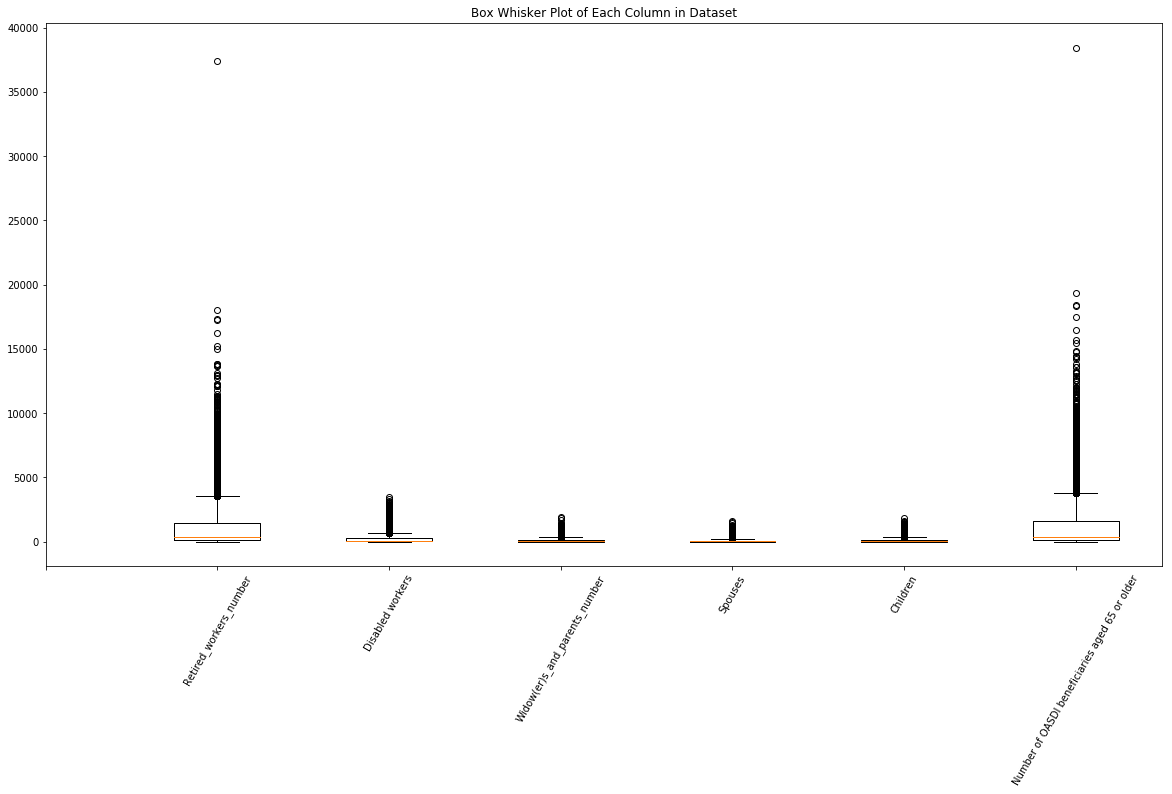

In [34]:
list_for_box = list(df4.columns.values)
list_for_box.pop(0)

# Create a Box Whisker Plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df4[col] for col in df4.columns if col!='Zip_Code' ])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(len(df4.columns.values)), ['']+list_for_box, rotation=60)
plt.show()

In [35]:
for col in df4.columns:
    df4 = df4[df4[col] > 5]
    
len(df4)

24452

In [36]:
df5 = pd.merge(df3, df4, on='Zip_Code', how='inner')
df5.head(2)

,State_Name,Type,Zip_Code,ALand,AWater,Mean,Median,Stdev,Population,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Number of OASDI beneficiaries aged 65 or older
0,Alabama,City,36611,10894952,909156,38773,30506,33101,5955,735,325,130,40,125,835
1,Alabama,City,36048,26070325,23254,37725,19528,43789,1430,310,125,40,10,50,330


In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13528 entries, 0 to 13527
Data columns (total 15 columns):
State_Name                                        13528 non-null object
Type                                              13528 non-null object
Zip_Code                                          13528 non-null int64
ALand                                             13528 non-null int64
AWater                                            13528 non-null int64
Mean                                              13528 non-null int64
Median                                            13528 non-null int64
Stdev                                             13528 non-null int64
Population                                        13528 non-null int64
Retired_workers_number                            13528 non-null int64
Disabled workers                                  13528 non-null int64
Widow(er)s_and_parents_number                     13528 non-null int64
Spouses                              

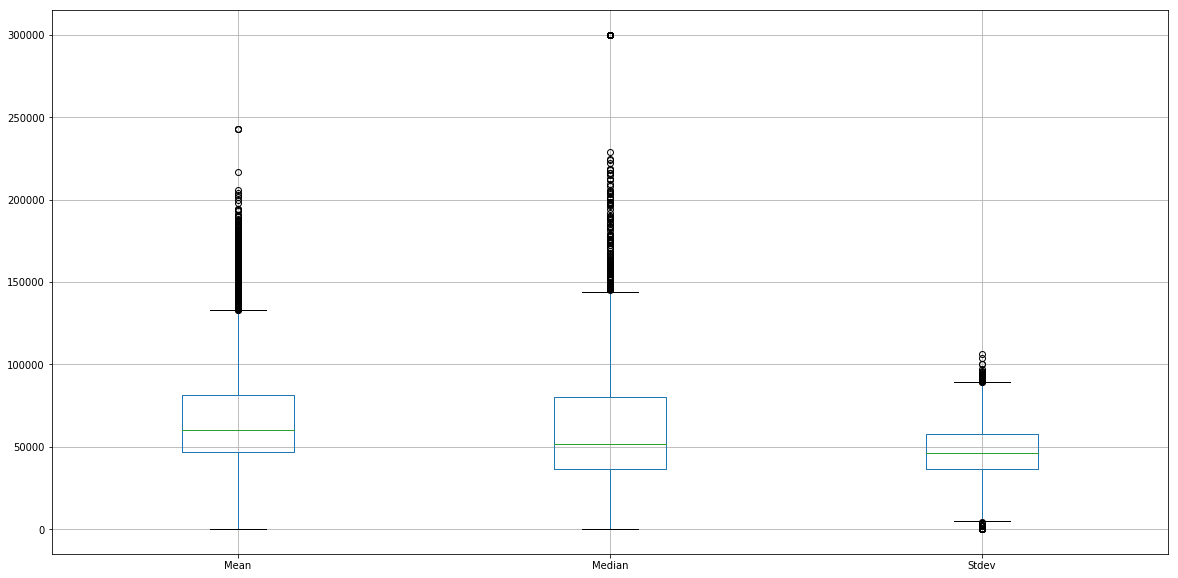

In [38]:
plt.figure(figsize=(20, 10))
boxplot = df5.boxplot(column=['Mean', 'Median','Stdev'])
plt.show();

In [39]:
len(df5)

13528

In [40]:
df5 = df5[df5.Median != 300000]
df5 = df5[df5.Median>1000]

In [41]:
len(df5)

11620

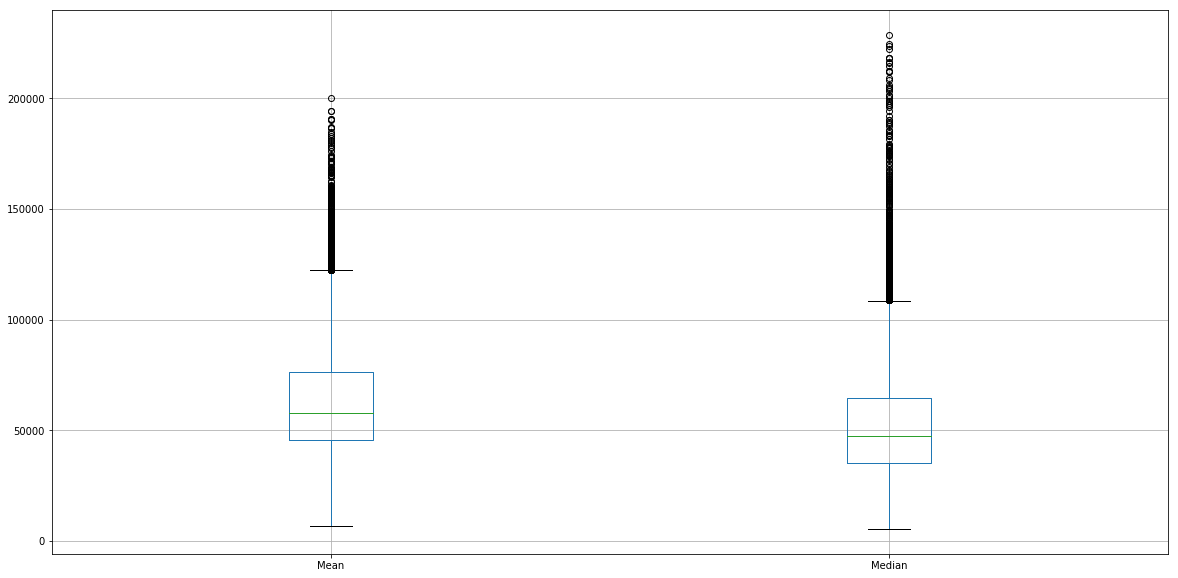

In [42]:
plt.figure(figsize=(20, 10))
boxplot = df5.boxplot(column=['Mean', 'Median'])
plt.show();

In [43]:
df5.head(2)

,State_Name,Type,Zip_Code,ALand,AWater,Mean,Median,Stdev,Population,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Number of OASDI beneficiaries aged 65 or older
0,Alabama,City,36611,10894952,909156,38773,30506,33101,5955,735,325,130,40,125,835
1,Alabama,City,36048,26070325,23254,37725,19528,43789,1430,310,125,40,10,50,330


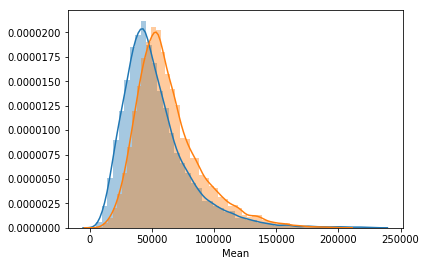

In [44]:
sns.distplot(df5['Median']);
sns.distplot(df5['Mean']);

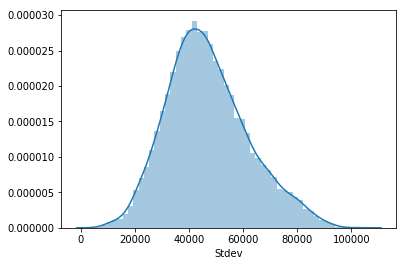

In [45]:
sns.distplot(df5['Stdev']);

In [46]:
df5['Type'].value_counts()


Track           9548
City             807
CDP              543
Town             318
Village          284
Borough           95
Community         14
Urban              8
County             2
Municipality       1
Name: Type, dtype: int64

In [47]:
df5['Type'] = df5['Type'].replace(['Municipality', 'County'], 'Community')
df5['Type'] = df5['Type'].replace(['Urban'], 'City')

In [48]:
df5['Type'].value_counts()

Track        9548
City          815
CDP           543
Town          318
Village       284
Borough        95
Community      17
Name: Type, dtype: int64

In [49]:
df5.describe()

,Zip_Code,ALand,AWater,Mean,Median,Stdev,Population,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Number of OASDI beneficiaries aged 65 or older
count,11620.000000,1.162000e+04,1.162000e+04,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000
mean,48898.890103,1.217729e+08,3.073862e+06,63595.035112,53263.228227,46915.822375,19828.621429,2477.926850,525.301635,238.198795,140.240103,248.698795,2667.808090
std,27908.066422,6.484929e+08,2.317899e+07,26564.874206,27592.104233,15098.199318,17026.341719,2007.081888,456.906433,189.034663,135.714308,215.206309,2159.126751
min,601.000000,6.909400e+04,0.000000e+00,6804.000000,5252.000000,5600.000000,1002.000000,35.000000,10.000000,10.000000,10.000000,10.000000,40.000000
25%,27842.750000,2.577235e+06,0.000000e+00,45446.000000,35094.750000,36358.750000,5828.000000,855.000000,175.000000,85.000000,45.000000,85.000000,920.000000
50%,46952.500000,8.634226e+06,7.824600e+04,57901.000000,47281.500000,45304.000000,15393.000000,1995.000000,400.000000,195.000000,100.000000,190.000000,2147.500000
75%,73031.000000,7.130567e+07,8.814038e+05,76192.250000,64521.500000,56089.250000,29410.000000,3615.000000,750.000000,345.000000,195.000000,355.000000,3890.000000
max,99926.000000,4.685105e+10,1.396368e+09,200012.000000,228723.000000,103836.000000,115104.000000,37440.000000,3490.000000,1895.000000,1645.000000,1825.000000,38455.000000


In [50]:
df5 = pd.get_dummies(df5, columns=['Type'])
df5 = pd.get_dummies(df5, columns=['State_Name'])

In [51]:
df5.reset_index(drop=True, inplace = True)

In [52]:
df5.head(2)

,Zip_Code,ALand,AWater,Mean,Median,Stdev,Population,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,...,State_Name_South Dakota,State_Name_Tennessee,State_Name_Texas,State_Name_Utah,State_Name_Vermont,State_Name_Virginia,State_Name_Washington,State_Name_West Virginia,State_Name_Wisconsin,State_Name_Wyoming
0,36611,10894952,909156,38773,30506,33101,5955,735,325,130,...,0,0,0,0,0,0,0,0,0,0
1,36048,26070325,23254,37725,19528,43789,1430,310,125,40,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df5['Median_Target'] = np.where(df5['Median']>49000,1,0)

In [54]:
df5.Median_Target.value_counts()

0    6167
1    5453
Name: Median_Target, dtype: int64

In [55]:
Target = df5['Median_Target']

In [56]:
df5 = df5.drop(["Zip_Code",'Median','Mean','Stdev','Median_Target'],axis=1)
df5.head(1)

,ALand,AWater,Population,Retired_workers_number,Disabled workers,Widow(er)s_and_parents_number,Spouses,Children,Number of OASDI beneficiaries aged 65 or older,Type_Borough,...,State_Name_South Dakota,State_Name_Tennessee,State_Name_Texas,State_Name_Utah,State_Name_Vermont,State_Name_Virginia,State_Name_Washington,State_Name_West Virginia,State_Name_Wisconsin,State_Name_Wyoming
0,10894952,909156,5955,735,325,130,40,125,835,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df5.shape

(11620, 68)

In [58]:

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(df5, Target, test_size=0.2)
print(X_train_b.shape)
print(X_test_b.shape)
print(y_train_b.shape)
print(y_test_b.shape)

(9296, 68)
(2324, 68)
(9296,)
(2324,)


In [59]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [60]:

#baseline logistic 
print('baseline Logistic')
print('-------------------')
lm = LogisticRegression()
lm.fit(X_train_b, y_train_b)
test_preds = lm.predict(X_test_b)
print_metrics(y_test_b, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test_b, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Logistic
-------------------
Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.5236660929432013
F1 Score: 0.0
-------------------
True Positives: 0
True Negatives: 1217
False Positives: 0
False Negatives: 1107


In [61]:
#create polynomial features and interaction terms
poly = PolynomialFeatures(degree=2)
poly.fit(df5)
column_names = poly.get_feature_names(df5.columns)
feature_poly= pd.DataFrame(poly.transform(df5), columns=column_names)

In [62]:
feature_poly.shape

(11620, 2415)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(feature_poly, Target, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9296, 2415)
(2324, 2415)
(9296,)
(2324,)


In [64]:
#scale data
sc=StandardScaler()
#firt model to training data - not testing data
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [68]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [69]:
#Use F test for feature Selection
selector = SelectKBest(f_regression, k=48)
selector.fit(X_train_scaled, y_train)

SelectKBest(k=48, score_func=<function f_regression at 0x1a20f09b70>)

In [ ]:
# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_test_scaled = pd.DataFrame(X_test_scaled)
# X_train_scaled.head()

In [70]:
selected_columns = X_train_scaled.columns[selector.get_support()]
removed_columns = X_train_scaled.columns[~selector.get_support()]
X_train_scaled = X_train_scaled[selected_columns]
X_test_scaled = X_test_scaled[selected_columns]


(9296, 2415)

In [71]:
X_test_scaled.columns

Index(['Population', 'Retired_workers_number', 'Disabled workers', 'Spouses',
       'Children', 'Number of OASDI beneficiaries aged 65 or older',
       'State_Name_Connecticut', 'State_Name_Maryland',
       'State_Name_Massachusetts', 'State_Name_New Jersey',
       'State_Name_New York', 'State_Name_North Carolina',
       'State_Name_Puerto Rico', 'ALand State_Name_Massachusetts',
       'Population Retired_workers_number',
       'Population Number of OASDI beneficiaries aged 65 or older',
       'Population Type_Track', 'Population State_Name_New Jersey',
       'Retired_workers_number^2', 'Retired_workers_number Spouses',
       'Retired_workers_number Number of OASDI beneficiaries aged 65 or older',
       'Retired_workers_number Type_Track',
       'Retired_workers_number State_Name_New Jersey', 'Disabled workers^2',
       'Disabled workers Widow(er)s_and_parents_number',
       'Disabled workers Children', 'Disabled workers Type_Track',
       'Disabled workers State_Name_P

In [72]:
#baseline logistic - use scaled data
print('baseline Logistic')
print('-------------------')
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Logistic
-------------------
Precision Score: 0.7332601536772777
Recall Score: 0.6034327009936766
Accuracy Score: 0.7065404475043029
F1 Score: 0.6620416253716551
-------------------
True Positives: 668
True Negatives: 974
False Positives: 243
False Negatives: 439


In [73]:
grid_params_lr = [{'penalty': ['l1', 'l2'], 
                    'C' : [0.001,0.01,0.1,1,2,5,6,7]}] 

# 'fit_intercept': [True,False]
gs_lr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1,verbose = 1),
                    param_grid=grid_params_lr,
                    scoring='f1',
                    cv=5)
gs_lr.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_lr.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_lr.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_lr.best_estimator_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]0.6533999805996532
{'C': 5, 'penalty': 'l1'}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=1, warm_start=False)


In [77]:
grid_params_lr = [{'penalty': ['l1'], 
                    'C' : [5,6,10],'fit_intercept':[True,False]}] 

# 'fit_intercept': [True,False]
gs_lr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1,verbose = 1),
                    param_grid=grid_params_lr,
                    scoring='f1',
                    cv=5)
gs_lr.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_lr.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_lr.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_lr.best_estimator_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]0.6759011659715306
{'C': 5, 'fit_intercept': False, 'penalty': 'l1'}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=1, warm_start=False)


In [79]:
#baseline logistic - use scaled data
print('Improved Logistic')
print('-------------------')
lm = LogisticRegression(penalty='l1',C=5, fit_intercept=False)
lm.fit(X_train_scaled, y_train)
test_preds = lm.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Improved Logistic
-------------------
Precision Score: 0.7149853085210578
Recall Score: 0.6594399277326106
Accuracy Score: 0.7125645438898451
F1 Score: 0.6860902255639098
-------------------
True Positives: 730
True Negatives: 926
False Positives: 291
False Negatives: 377


In [80]:
#baseline Decision Tree - don't use scaled data
print('baseline Decision Tree')
print('-------------------')
dtr = DecisionTreeClassifier()
dtr.fit(X_train_scaled, y_train)
test_preds = dtr.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline Decision Tree
-------------------
Precision Score: 0.6157989228007181
Recall Score: 0.6196928635953026
Accuracy Score: 0.6346815834767642
F1 Score: 0.6177397568662764
-------------------
True Positives: 686
True Negatives: 789
False Positives: 428
False Negatives: 421


In [82]:
grid_params_dt = [{'criterion': ['gini','entropy'], 
                    'min_samples_leaf' : range(5,100,10),
                    'max_depth': range(2,20,1)}] 

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=grid_params_dt,
                    scoring='f1',
                    cv=5,n_jobs= -1, verbose=2)
gs_dt.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_dt.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_dt.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_dt.best_estimator_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:   49.1s


0.6647222034533073
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 65}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=65, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.3min finished


In [83]:
#baseline Decision Tree - don't use scaled data
print('improved Decision Tree')
print('-------------------')
dtr = DecisionTreeClassifier(criterion='entropy',max_depth= 9, min_samples_leaf=65  )
dtr.fit(X_train_scaled, y_train)
test_preds = dtr.predict(X_test_scaled)
print_metrics(y_test, test_preds)

print('-------------------')
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

improved Decision Tree
-------------------
Precision Score: 0.6995515695067265
Recall Score: 0.7046070460704607
Accuracy Score: 0.7151462994836488
F1 Score: 0.702070207020702
-------------------
True Positives: 780
True Negatives: 882
False Positives: 335
False Negatives: 327


In [84]:
#baseline KNN - use scaled data
print('baseline KNN')
print('-------------------')
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_preds = knn.predict(X_test_scaled)
print_metrics(y_test, y_preds)
print('-------------------')
confusion = metrics.confusion_matrix(y_test, y_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

baseline KNN
-------------------
Precision Score: 0.6811862835959221
Recall Score: 0.6639566395663956
Accuracy Score: 0.6919104991394148
F1 Score: 0.6724611161939615
-------------------
True Positives: 735
True Negatives: 873
False Positives: 344
False Negatives: 372


In [85]:
#find best k
k_range = list(range(1,15))
k_scores = []
best_score = 0
best_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    y_predict = knn.predict(X_test_scaled)
    score = metrics.f1_score(y_test, y_predict, average='binary')
    k_scores.append( score)
    if score > best_score:
        best_score = score
        best_k = k
        
print(best_score)
print(best_k)
print(k_scores)


0.6912103083294984
13
[0.6321100917431193, 0.5618101545253863, 0.6569741026805996, 0.6141078838174273, 0.6724611161939615, 0.6514172053704624, 0.6873290793072014, 0.6604696673189824, 0.6900958466453674, 0.6715257531584062, 0.6910755148741419, 0.675636713118693, 0.6912103083294984, 0.6842105263157895]


In [86]:
grid_params_KNN = [{'p': [1,2,3],
                    'weights': ['uniform', 'distance']}] 

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13,n_jobs=-1),
                           param_grid=grid_params_KNN,
                           scoring='f1',
                           cv=5, verbose = 2)
gs_KNN.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_KNN.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_KNN.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_KNN.best_estimator_)
val_preds = gs_KNN.predict(X_test_scaled)
print (f1_score(y_test, val_preds))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] p=1, weights=uniform ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. p=1, weights=uniform, total=   0.3s
[CV] p=1, weights=uniform ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ............................. p=1, weights=uniform, total=   0.3s
[CV] p=1, weights=uniform ............................................
[CV] ............................. p=1, weights=uniform, total=   0.3s
[CV] p=1, weights=uniform ............................................
[CV] ............................. p=1, weights=uniform, total=   0.3s
[CV] p=1, weights=uniform ............................................
[CV] ............................. p=1, weights=uniform, total=   0.5s
[CV] p=1, weights=distance ...........................................
[CV] ............................ p=1, weights=distance, total=   0.3s
[CV] p=1, weights=distance ...........................................
[CV] ............................ p=1, weights=distance, total=   0.2s
[CV] p=1, weights=distance ...........................................
[CV] ............................ p=1, weights=distance, total=   0.2s
[CV] p=1, weights=distance ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.2min finished


0.6964856230031948


In [88]:
#baseline KNN - use scaled data
print('Improved KNN')
print('-------------------')
knn = KNeighborsClassifier(n_neighbors=13,p=1)
knn.fit(X_train_scaled, y_train)
y_preds = knn.predict(X_test_scaled)
print_metrics(y_test, y_preds)
print('-------------------')
confusion = metrics.confusion_matrix(y_test, y_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Improved KNN
-------------------
Precision Score: 0.7038745387453874
Recall Score: 0.6892502258355917
Accuracy Score: 0.713855421686747
F1 Score: 0.6964856230031948
-------------------
True Positives: 763
True Negatives: 896
False Positives: 321
False Negatives: 344


In [89]:
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled, y_train)
training_preds = clf.predict(X_train_scaled)
val_preds = clf.predict(X_test_scaled)
print_metrics(y_test, val_preds)
print('-------------------')
confusion = metrics.confusion_matrix(y_test, val_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Precision Score: 0.7382352941176471
Recall Score: 0.6802168021680217
Accuracy Score: 0.7327882960413081
F1 Score: 0.7080394922425952
-------------------
True Positives: 753
True Negatives: 950
False Positives: 267
False Negatives: 354


In [91]:
param_grid = {
    "learning_rate": [0.1,0.2],
    'max_depth': [5,6],
    'min_child_weight': [5,10],
    'subsample': [ 0.7,0.8],
    'n_estimators': [5, 30, 100, 250],
}

In [92]:
grid_clf = GridSearchCV(clf,param_grid,scoring='f1',cv=5, n_jobs=-1,verbose = 1)
grid_clf.fit(X_train_scaled, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_scaled)
val_preds = grid_clf.predict(X_test_scaled)




Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  5.7min finished


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 5
n_estimators: 100
subsample: 0.8


In [93]:
print(grid_clf.best_score_)

0.6975069081586127


In [94]:
clf = xgb.XGBClassifier(max_depth=5,subsample= 0.8,min_child_weight = 5)
clf.fit(X_train_scaled, y_train)
training_preds = clf.predict(X_train_scaled)
val_preds = clf.predict(X_test_scaled)
print_metrics(y_test, val_preds)
print ('Improved XGB')
print('-------------------')
confusion = metrics.confusion_matrix(y_test, val_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Precision Score: 0.735050597976081
Recall Score: 0.7217705510388437
Accuracy Score: 0.7435456110154905
F1 Score: 0.7283500455788514
Improved XGB
-------------------
True Positives: 799
True Negatives: 929
False Positives: 288
False Negatives: 308


In [95]:
forest = RandomForestClassifier(n_jobs=-1,verbose=1)
forest.fit(X_train_scaled, y_train)
training_preds = forest.predict(X_train_scaled)
val_preds = forest.predict(X_test_scaled)
print_metrics(y_test, val_preds)
print('-------------------')
confusion = metrics.confusion_matrix(y_test, val_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


Precision Score: 0.7219873150105708
Recall Score: 0.6169828364950316
Accuracy Score: 0.7043889845094664
F1 Score: 0.6653677545056015
-------------------
True Positives: 683
True Negatives: 954
False Positives: 263
False Negatives: 424


In [96]:
param_grid_forest= {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

gs_forest = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=param_grid_forest,
                    scoring='f1',
                    cv=5,n_jobs=-1,verbose = 1)
gs_forest.fit(X_train_scaled, y_train)
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(gs_forest.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs_forest.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs_forest.best_estimator_)




Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 32.0min finished


0.6897955603702806
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [97]:
forest = RandomForestClassifier(bootstrap= True, max_depth= 90, max_features= 3, min_samples_leaf=3, min_samples_split= 12, n_estimators= 100,n_jobs=-1)
forest.fit(X_train_scaled, y_train)
training_preds = forest.predict(X_train_scaled)
val_preds = forest.predict(X_test_scaled)
print_metrics(y_test, val_preds)
print('-------------------')
confusion = metrics.confusion_matrix(y_test, val_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

Precision Score: 0.7368421052631579
Recall Score: 0.6955736224028907
Accuracy Score: 0.7366609294320138
F1 Score: 0.7156133828996282
-------------------
True Positives: 770
True Negatives: 942
False Positives: 275
False Negatives: 337
